In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingItaly.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,10745,2014-12-02,Italy,41.890353,12.468493,2.0,1.0,1.0,1.0,70.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12
1,10746,2014-12-03,Italy,41.900501,12.472768,2.0,1.0,1.0,1.0,82.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,12
2,10747,2013-05-30,Italy,41.893226,12.474161,4.0,1.0,1.0,2.0,84.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5
3,10748,2010-08-03,Italy,41.899733,12.458115,3.0,1.0,1.0,1.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8
4,10749,2012-09-20,Italy,41.895479,12.470749,5.0,1.0,1.0,1.0,112.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24906,486969,2014-02-06,Italy,41.888464,12.494247,2.0,1.0,1.0,2.0,53.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2
24907,486970,2014-04-09,Italy,41.890151,12.469558,4.0,1.0,1.0,2.0,145.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
24908,486971,2012-11-28,Italy,41.893842,12.501468,5.0,1.0,1.0,2.0,70.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,11
24909,486972,2014-06-05,Italy,41.897318,12.469828,4.0,1.0,1.0,2.0,112.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,6


<AxesSubplot:ylabel='Frequency'>

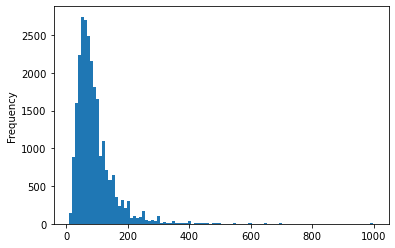

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,10745,2014-12-02,Italy,41.890353,12.468493,2.0,1.0,1.0,1.0,70.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12,group_2
1,10746,2014-12-03,Italy,41.900501,12.472768,2.0,1.0,1.0,1.0,82.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,12,group_2
2,10747,2013-05-30,Italy,41.893226,12.474161,4.0,1.0,1.0,2.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5,group_2
3,10748,2010-08-03,Italy,41.899733,12.458115,3.0,1.0,1.0,1.0,35.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8,group_1
4,10749,2012-09-20,Italy,41.895479,12.470749,5.0,1.0,1.0,1.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9,group_3


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_2    0.471497
group_1    0.253462
group_3    0.169510
group_4    0.060066
group_5    0.045464
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_2    0.471403
group_1    0.253462
group_3    0.169577
group_4    0.060205
group_5    0.045354
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
6553,141314,2013-02-21,Italy,41.872717,12.468647,1.0,2.0,1.0,1.0,40.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2
16954,336804,2014-04-04,Italy,41.923973,12.513429,2.0,1.0,1.0,2.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,4
3509,72117,2015-06-10,Italy,41.875621,12.521413,3.0,1.0,1.0,2.0,49.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6
12084,249344,2016-02-08,Italy,41.881236,12.505861,4.0,1.0,1.0,2.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2
10276,187012,2014-05-19,Italy,41.917495,12.496704,2.0,1.0,1.0,1.0,90.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
11689,41.895876,12.505132,4.0,1.0,1.0,4.0,41.0,2.0,20.0,1.0,1125.0,9.0,0.0,1.0,0.0,6,11
21099,45.424438,12.324257,4.0,1.0,1.0,2.0,130.0,2.0,10.0,5.0,1125.0,1.0,1.0,0.0,0.0,0,9
13536,41.896855,12.440722,4.0,1.0,1.0,2.0,75.0,1.0,0.0,2.0,1125.0,33.0,1.0,0.0,0.0,3,1
16861,41.896746,12.511782,2.0,2.0,1.0,1.0,45.0,1.0,15.0,2.0,1125.0,150.0,0.0,1.0,0.0,4,9
7693,41.906803,12.477524,2.0,1.0,1.0,1.0,57.0,2.0,0.0,3.0,1125.0,35.0,0.0,1.0,0.0,1,11


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
6553,40.0
16954,35.0
3509,49.0
12084,60.0
10276,90.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
6553,41.872717,12.468647,1.0,2.0,1.0,1.0,1.0,0.0,1.0,7.0,56.0,0.0,1.0,0.0,3,2
16954,41.923973,12.513429,2.0,1.0,1.0,2.0,1.0,10.0,1.0,2.0,1.0,0.0,1.0,0.0,4,4
3509,41.875621,12.521413,3.0,1.0,1.0,2.0,2.0,0.0,2.0,1125.0,30.0,0.0,1.0,0.0,2,6
12084,41.881236,12.505861,4.0,1.0,1.0,2.0,2.0,20.0,2.0,1125.0,59.0,1.0,0.0,0.0,0,2
10276,41.917495,12.496704,2.0,1.0,1.0,1.0,1.0,0.0,2.0,7.0,3.0,0.0,1.0,0.0,0,5


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
11689,41.0
21099,130.0
13536,75.0
16861,45.0
7693,57.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
11689,41.895876,12.505132,4.0,1.0,1.0,4.0,2.0,20.0,1.0,1125.0,9.0,0.0,1.0,0.0,6,11
21099,45.424438,12.324257,4.0,1.0,1.0,2.0,2.0,10.0,5.0,1125.0,1.0,1.0,0.0,0.0,0,9
13536,41.896855,12.440722,4.0,1.0,1.0,2.0,1.0,0.0,2.0,1125.0,33.0,1.0,0.0,0.0,3,1
16861,41.896746,12.511782,2.0,2.0,1.0,1.0,1.0,15.0,2.0,1125.0,150.0,0.0,1.0,0.0,4,9
7693,41.906803,12.477524,2.0,1.0,1.0,1.0,2.0,0.0,3.0,1125.0,35.0,0.0,1.0,0.0,1,11


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_17796/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

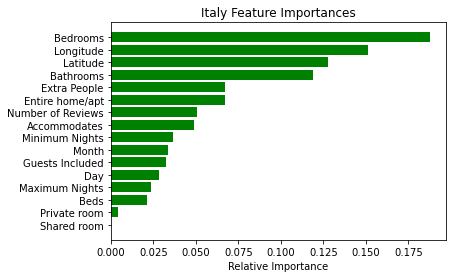

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Italy Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

244.86901804997993 15.648291218212291 8.638340525893215


In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)